### Import everything necessary to build the models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import re
import string

### Download packages for nltk

In [2]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marten/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/marten/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import csv
with open(r"./Datasets/fake.csv", 'rb') as f:
    reader = csv.reader(f)
    linenumber = 1
    try:
        for row in reader:
            linenumber += 1
    except Exception as e:
        print (("Error line %d: %s %s" % (linenumber, str(type(e)), "broken")))

Error line 1: <class '_csv.Error'> broken


### Read in news data

In [4]:
true1 = pd.read_csv("./Datasets/true.csv", lineterminator='\n')
true2 = pd.read_csv("./Datasets/mix_true.csv", lineterminator='\n')
fake2 = pd.read_csv("./Datasets/mix_fake.csv", lineterminator='\n')
fake1 = pd.read_csv("./Datasets/fake.csv", lineterminator='\n')

In [5]:
true1.head()

,title,text,date
0,as US budget fight looms republicans flip thei...,washington reuters the head of a conservative...,2017-12-31
1,US military to accept transgender recruits on ...,washington reuters transgender people will be...,2017-12-29
2,senior US republican senator let mr mueller do...,washington reuters the special coUSel investi...,2017-12-31
3,fbi rUSia probe helped by australian diplomat ...,washington reuters trump campaign adviser geo...,2017-12-30
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,2017-12-29


In [6]:
fake2.head()

,title,text,date
0,intl community still financing protecting terr...,st century wire says wire reported on friday ...,2016-10-26
1,fbi director comeys leaked memo explains why h...,in a stunning turn of events days before the ...,2016-10-29
2,fbi redux whats behind new probe into hillary ...,a tidal wave of revelations is pouring out of ...,2016-10-29
3,party corruption clinton campaign directly tie...,november by wire comments patrick hennings...,2016-11-01
4,hillarys rUSian hack hoax the biggest lie of t...,november by shawn helton comment shawn hel...,2016-11-01


### Assign a class value of 1 to legitimate news and a class value of 0 to fake news

In [7]:
true1["class"] = 1
true2["class"] = 1

In [8]:
fake1["class"] = 0
fake2["class"] = 0

### Combine all the fake and legitimate news into one dataframe

In [14]:
data = pd.concat([true1, true2, fake1,fake2], axis=0)
data = data.dropna()
data

,title,text,date,class
0,as US budget fight looms republicans flip thei...,washington reuters the head of a conservative...,2017-12-31,1
1,US military to accept transgender recruits on ...,washington reuters transgender people will be...,2017-12-29,1
2,senior US republican senator let mr mueller do...,washington reuters the special coUSel investi...,2017-12-31,1
3,fbi rUSia probe helped by australian diplomat ...,washington reuters trump campaign adviser geo...,2017-12-30,1
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,2017-12-29,1
...,...,...,...,...
1285,how to report voter fraud crash coUSe,print sidebyside of bill clinton and danney wi...,2016-11-08,0
1286,national attention on ayotte hassan nh senate...,print have you ever noticed how washington al...,2016-11-09,0
1287,how to have honest elections,will it be representative government or thugoc...,2016-11-12,0
1288,all wars are bankers wars,for those who are too young or too unwilling t...,2016-11-18,0


### We will only be classifying the news based on text

In [15]:
data = data.drop(data.columns.difference(["text", "class"]), axis=1)

In [16]:
data

,text,class
0,washington reuters the head of a conservative...,1
1,washington reuters transgender people will be...,1
2,washington reuters the special coUSel investi...,1
3,washington reuters trump campaign adviser geo...,1
4,seattlewashington reuters president donald tr...,1
...,...,...
1285,print sidebyside of bill clinton and danney wi...,0
1286,print have you ever noticed how washington al...,0
1287,will it be representative government or thugoc...,0
1288,for those who are too young or too unwilling t...,0


### Split the data into training and test data


In [17]:
x_train, x_test, y_train, y_test = train_test_split(data["text"], data["class"], test_size=0.25)

### Vectorize the text so the models can actually interpret it

In [18]:
# We will be ignoring stop words such as "the" "and" "or"
vectorizer = TfidfVectorizer(stop_words=stopwords.words("english"))
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

### Logistic Regression model

In [19]:
log_reg = LogisticRegression()
log_reg.fit(x_train_vectorized, y_train)
pred = log_reg.predict(x_test_vectorized)
print(f"{log_reg.__class__.__name__} accuracy: {log_reg.score(x_test_vectorized, y_test)}")

LogisticRegression accuracy: 0.9737741329232872


### Decision tree classifier

In [20]:
decision_tree = DecisionTreeClassifier(max_depth=100)
decision_tree.fit(x_train_vectorized, y_train)

print(f"{decision_tree.__class__.__name__} accuracy: {decision_tree.score(x_test_vectorized, y_test)}")

DecisionTreeClassifier accuracy: 0.9808645139244832


### Random forest classifier

In [22]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest.fit(x_train_vectorized, y_train)

print(f"{random_forest.__class__.__name__} accuracy: {random_forest.score(x_test_vectorized, y_test)}")

RandomForestClassifier accuracy: 0.9435332308218007


### Multinomial naive Bayes model

In [23]:
multi_nb = MultinomialNB()
multi_nb.fit(x_train_vectorized, y_train)
print(f"{multi_nb.__class__.__name__} accuracy: {multi_nb.score(x_test_vectorized, y_test)}")

MultinomialNB accuracy: 0.9259354177344952


### ROC curves to show the performance of each model. Shown seperately and all on one plot.

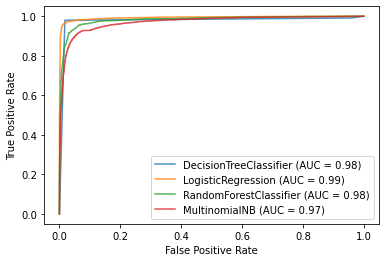

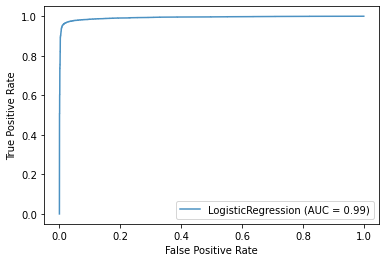

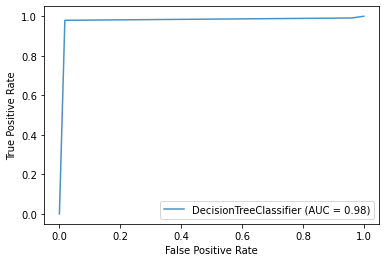

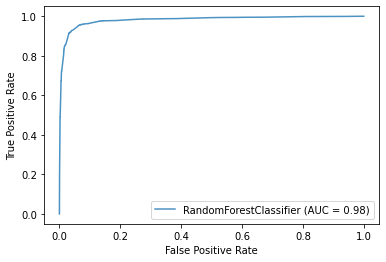

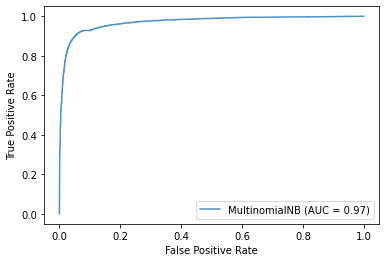

In [24]:
ax = plt.gca()
log_reg_disp = metrics.plot_roc_curve(log_reg, x_test_vectorized, y_test, alpha=0.8)
decision_tree_disp = metrics.plot_roc_curve(decision_tree, x_test_vectorized, y_test, alpha=0.8)
random_forest_disp = metrics.plot_roc_curve(random_forest, x_test_vectorized, y_test, alpha=0.8)
multi_nb_disp = metrics.plot_roc_curve(multi_nb, x_test_vectorized, y_test, alpha=0.8)
decision_tree_disp.plot(ax=ax, alpha=0.8)
log_reg_disp.plot(ax=ax,alpha=0.8)
random_forest_disp.plot(ax=ax,alpha=0.8)
multi_nb_disp.plot(ax=ax, alpha=0.8)

In [25]:
log_reg_disp

In [ ]:
def wordCorrect(text):
    text = text.lower()
    text = re.sub("'","", text)
    text = re.sub('u.s', 'xUSx', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub("https?://\S+|www\. \S+", "", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('xUSx', 'u.s', text)
    
    return text

## The articles array consists of 4 articles. The first and last are fake, the middle 2 are real from CNN.

In [ ]:
articles = ["""On Monday, extremely credible and incredibly accurate reports revealed that Joe Biden will be attending the first presidential debate Tuesday night with an earpiece hidden in his auditory canal and methamphetamine screaming through his blood.

These revelations — which definitely are not baseless conspiracies fomented by the Trump campaign in a last-ditch effort to prepare its supporters for the vast disparity between what they’ve been told Joe Biden is like (a man suffering from late-stage dementia) and what he is actually like (an old man who sometimes misspeaks but remains competent at retail politics) — helped spur a new round of reporting on the Democratic nominee’s debate preparations Tuesday afternoon.

First, journalist Todd Starnes of The Starnes Media Group (no relation), reported that the Iowa radio station KXEL had itself reported that the “word on the street” was that Joe Biden “got tonight’s debate questions in advance.”""",
              """As the first doses of a coronavirus vaccine are prepared for shipment to communities across the United States, President Donald Trump has an opportunity to mark a historic milestone for science -- and show some semblance of leadership in curbing the spread of Covid-19 as the number of US cases crosses 16 million.

Instead, he is engaged in self-sabotage, distracting Americans from that great accomplishment for his administration by spreading more election disinformation while questioning whether to fire Attorney General William Barr, in part, because Barr did not inform Trump of the federal investigation into the business dealings of Hunter Biden, the son of President-elect Joe Biden, before the election. Slashing at Barr on Twitter this weekend instead of focusing on saving American lives amid a deadly surge in coronavirus cases, Trump reminded the nation of one of the truisms about the way he has regarded his allies both in business and politics: everyone is expendable if they do not follow his dictates. No matter how loyal an aide has been -- and regardless of how many times they put their own reputation on the line to do Trump's bidding -- the President has shown no compunction about casting them aside as soon he is convinced they are no longer useful as one of his political tools.
He has treated the Justice Department as though it were a fleet of his own personal lawyers, attempting to pressure them into investigating his political enemies and showing a disturbing lack of respect for the department's historic independence from politics.
During an interview with Fox News that aired Sunday, Trump said he was disappointed that Barr did not reveal the existence of the investigation before the election: "Everybody is," he said. "Bill Barr should have stepped up."
Barr, a longtime Trump loyalist who has taken many questionable steps on Trump's behalf, had already infuriated the President by recently telling the Associated Press that he had not seen any evidence to support Trump's false assertions about widespread election fraud that would change the results of the election.
Their broken relationship deteriorated further after Trump found out that Barr held to the longtime Justice Department precedent that it should not take overt actions that could affect an election and therefore kept the investigation into Biden's son under wraps before November 3.
The two men had a contentious meeting earlier this month, CNN's White House team reported. On Saturday morning, Trump took his grievances public, retweeting a missive suggesting that Barr should be fired by the end of the day. "Why didn't Bill Barr reveal the truth to the public, before the Election, about Hunter Biden," Trump tweeted Saturday. "Big disadvantage for Republicans at the polls!"
Despite Trump's final legal defeat Friday night -- when the Supreme Court refused to hear a case that was part of the President's scheme to overturn the election results -- he also suggested both on Twitter and in the Fox interview that his efforts to overthrow the election would continue: "WE HAVE JUST BEGUN TO FIGHT!!!" he tweeted.
When asked whether he worried about the country being divided heading into the inauguration after his relentless onslaught against the American election system, he repeated his ludicrous claim that he won the election and said he was worried about America having an "illegitimate president."
A source familiar with the breakdown of the Trump and Barr relationship over their disagreements about the soundness of the election and the Hunter Biden investigation said their recent interactions have shown that Barr won't be intimidated by Trump.
"This is the real story. None of this matters -- it's the deposed king ranting. Irrelevant to the course of justice and to Trump's election loss," the source told CNN's Jamie Gangel Saturday after Trump tweeted about his displeasure with Barr.
Trump's thirst for attention and praise has clouded even these early days of the vaccine rollout, with doses of the Pfizer and BioNTech vaccine rolling out in trucks headed toward providers early Sunday after the US Food and Drug Administration authorized emergency use of the vaccine late Friday night.
Trump has not been pleased watching other nations like the United Kingdom authorize the Pfizer vaccine first -- seeming most concerned about ensuring that he gets the proper credit for his efforts to speed their development through his administration's Operation Warp Speed. In the Fox News interview, he claimed that he deserved the sole credit for the accelerating the development of the vaccine.
"If I wasn't President, according to almost everybody, even the enemy, if I wasn't President you wouldn't have a vaccine for five years," Trump said in the interview, which was taped Saturday at the Army-Navy game.
"I pushed the FDA and companies and everybody else involved like nobody's ever been pushed before, and now you have it rolling out and frankly you could have done it last week," Trump said. "They could have even done it a week sooner if they heard from me."
His frustrations about the pace of the vaccine review process spilled into public view hours before the FDA made its emergency use authorization announcement Friday. CNN reported that White House chief of staff Mark Meadows tried to intervene on behalf of the President by pressuring FDA Commissioner Dr. Stephen Hahn to make the decision by the end of the day, warning that he would be fired if he did not.
Hahn insisted Sunday in an interview with CNN's Jake Tapper that political pressure did not affect the process. "I've been really clear about this in my public statements -- that is an inaccurate representation of the conversation," he said of the characterization that he would be fired if he did not comply with the President's wish.
But medical experts have warned that even the appearance of a pressure campaign could make Americans more wary about taking the vaccine, because many are already concerned that the process was rushed.
"We've heard from a number of sources, including the White House, that there was a desire for us to move as quickly as possible," Hahn said on CNN's "State of the Union." "We have, but our absolute obligation to the American people was to make sure that we did a thorough scientific review. We needed to ensure that our gold standard of assessing the safety and the efficacy of vaccine was done and was done properly."
"We had to get this right, and I believe we did," Hahn said.
Taking the next step after the FDA's action, a key advisory panel to US Centers for Disease Control and Prevention -- the Advisory Committee on Immunization Practices -- voted to recommend the vaccine Saturday afternoon. The CDC took the final step when Dr. Robert Redfield, director of the CDC, accepted the recommendation of the advisory panel.
"Last night, I was proud to sign the Advisory Committee on Immunization Practices' recommendation to use Pfizer's COVID-19 vaccine in people 16 and older. This official CDC recommendation follows Friday's FDA decision to authorize the emergency use of Pfizer's vaccine," Redfield said in a statement Sunday.
"As COVID-19 cases continue to surge throughout the U.S., CDC's recommendation comes at a critical time," he continued. "Initial COVID-19 vaccination is set to start as early as Monday, and this is the next step in our efforts to protect Americans, reduce the impact of the COVID-19 pandemic, and help restore some normalcy to our lives and our country."
With shipments moving closer to reality, pressure is building on Congress to approve more money for state and local governments that will be overseeing the process of getting the vaccine where it needs to go once it is received by providers.
The first 2.9 million doses of the Pfizer vaccine will be administered to front-line health care workers and vulnerable Americans living in nursing homes and long-term care facilities. But Secretary of Health and Human Services Alex Azar has said he expects some 20 million doses to go out this month.
Once they are delivered in large quantities, some states will need to help break up the Pfizer shipments and get doses of the vaccine, which must be stored at extraordinarily low temperatures, to the farthest reaches of their states to providers who do not have the equipment to maintain ultra cold temperatures for long periods of time.
Lighting a fire under Congress to get aid to states so they can assist in that distribution process -- and begin developing campaigns to fight vaccine skepticism -- would be one area where a Trump pressure campaign would be helpful in getting the vaccine distributed more equitably and expeditiously.
But the President has not taken any overt steps to get congressional leaders to the negotiating table. Both sides have acknowledged that an emergency relief package is desperately needed to extend unemployment benefits for millions of unemployed workers and struggling businesses that are on the brink of economic devastation as a result of the closures forced by the pandemic.
Despite the best efforts of a bipartisan group of senators to work out a $908 billion framework for the package, negotiations have stalled over disagreements between the two parties on Covid-19 liability protections, which Republicans are insisting on, and more aid to state and local governments, a key priority for Democrats.
Louisiana Sen. Bill Cassidy, a Republican member of the bipartisan working group, said the group plans to introduce their emergency stimulus bill Monday night -- which would include financial aid for unemployed Americans and small businesses affected by the coronavirus. But it remains unclear whether Senate Majority Leader Mitch McConnell will advance the proposal.
"What Leader McConnell decides to do, I don't have control over. I only can do what I can do," Cassidy told Tapper on Sunday. "There will be a deal."
Though Trump has boasted about his prowess as a dealmaker, he has been largely absent as he has focused on fruitless legal battles to overturn the presidential election.
Kathleen Sebelius, a former secretary of Health and Human Services in the Obama administration, told CNN's Wolf Blitzer Saturday night that the funding for states that is needed to recruit and mobilize a workforce on the ground to administer the vaccine to millions of Americans is "one of the big missing pieces of this effort."
"The shipping that is being arranged from the Pfizer headquarters in Kalamazoo, (Michigan), to states around the country -- and to cold storage locations in those states -- is the federal government's piece of the puzzle," she said on "The Situation Room." Beyond that, "the Trump administration has said to states, 'You're kind of on your own. You need to get it from there into people's arms,'" she said.
Sebelius noted that the federal government has spent about $10 billion through Operation Warp Speed to help develop a safe and effective vaccine. But "they have spent, so far, $240 million -- total -- on efforts to state and local governments for increased testing and building up this public workforce."
"States say they need a couple of billion dollars. So part of the congressional package that is so desperately needed is getting these resources," she said.
"Even this limited early supply is going to be tough. When we get to a massive vaccination, it gets really challenging.""",
              """The United Kingdom and the European Union have warned a no-deal Brexit was now likely, even as they agreed -- once again -- to extend trade talks beyond a self-imposed Sunday deadline.

The talks were initially extended until Sunday after Wednesday's meeting between European Commission President Ursula von der Leyen and the UK Prime Minister Boris Johnson, billed as a "last-ditch effort," ended without an agreement.
No new deadline has been announced on Sunday, but von der Leyen said it was "responsible" to go "the extra-mile," adding that she had "constructive and useful" phone call with Johnson.
Speaking in London, Johnson said the two sides remain "far apart on key issues," and warned that "the most likely thing now is we have to get ready for WTO terms, Australia terms," he warned.
Australia doesn't have a free trade agreement with the European Union, even though talks to secure one are in progress. The expression "Australia terms" has been widely used by Johnson and his government as an euphemism for a no-deal Brexit.
But the term is misleading, because Australia and the EU already have a Mutual Recognition Agreement, which makes it easier for manufacturers to secure the regulatory approvals needed to sell their goods. However, the UK doesn't have such an agreement with the EU.
If no deal is agreed, it would be forced to trade with the bloc according to rules set out by the World Trade Organization. That would mean new tariffs and other barriers, such as regulatory checks and paperwork.
The British PM said his government will continue to try to reach a trade deal, but warned there may not be a resolution by the January 1 deadline. "I do think there is a deal to be done but we remain far apart on key issues.:
"And we have to take back control of our fisheries," Johnson said.
The European Union and the UK have been trying for months to agree on a trade deal before the Brexit "transition period" ends at midnight on December 31. Earlier this week, a joint statement by Johnson and von der Leyen cited three "critical" sticking points: fishing rights, the UK's ability to diverge on EU standards, and legal oversight of any deal.
Failing to reach a trade deal would be economically painful for both the EU and the UK, although the impact on the UK would be disproportionately larger, because the EU is by far its biggest trading partner. Losing access to its single market would cut UK's businesses off from Europe's 450 million consumers, and burden them with extra tariffs and red tape.
The UK Office for Budget Responsibility (OBR) estimates that a no-deal Brexit would knock off £40 billion ($53 billion), or 2%, of the UK's economic output in 2021, and leave more than 300,000 people unemployed by the second half of next year.
However, the OBR said in November that even if London and Brussels can reach a deal, their new trading relationship is expected to lead to a long-run loss of output of around 4% compared to Britain remaining in the European Union.
Ireland, which stands to lose the most on the EU side, said it was "absolutely imperative" that the UK and the EU reach a post-Brexit deal. The Irish Prime Minister, or Taoiseach, Micheál Martin told the BBC on Sunday that a no-deal scenario would be "so damaging to workers" in the UK, Ireland and across Europe, and represent "an appalling failure of statecraft."
Johnson said on Thursday that he had directed his cabinet to prepare for talks to fail, and the EU has released plans aimed at keeping its borders open to commercial aircraft, trains and trucks.
The UK Ministry of Defense said Saturday the UK will have "a range of robust enforcement measures" available at the end of the Brexit transition period, including "numerous" offshore patrol vessels available in its territorial waters.
Four offshore patrol vessels "will be available to patrol UK waters to assist other government departments where needed," the ministry said.""",
           """Facebook Class Action Illinois Ccam – Facebook Class Action Illinois Ccam Read Reasons This guide is all about getting the true story behind a famous lawsuit against Facebook.

It’s been said that Facebook utilized from Illinois can use Facebook to get a cash payout. As stated by the class-action lawsuit against the social networking business, Facebook has gathered a number of the tales and also a few facial templates of those consumers involving June 7, 2011, and August 19, 2020, to produce the settlement accepted. Additionally, the individual users are entitled to cash payments worth $200-$400.

Read this Guide to research more about Facebook Class Action Illinois Scam trending from the United States.
Before determining the Facebook Class Action Illinois Scam is actual or not, you want to be aware of the background story, do not you? This litigation was contrary to the face label characteristic of the site. By the instances, Facebook unites biometric info or confront print without users’ permission.

It’s stated that the Illinois biometric data policy act was obligated to employ this face tagging attribute from the United States, and Facebook failed to follow it. This season, the U. S. District Judge James Donate has supplied the approval to some $650 million settlement, where the majority of the members of this course can claim their cash. According to a different account, Facebook is also verified to alter the practice.

The amount is unknown the number of class members can review their cash in the social networking business. But a sensible prediction claims that a person gets approx. Alternatively, four qualified people’s families could get up to $800-$1,600. On the flip side, based on these, Facebook Class Action Illinois Scam, Facebook never compensated because of it.
The electronic world is changing suddenly. At the same time, it affects the consumers also. So, discovering the facts, Facebook is consented to pay $650 million since the settlement cash to Illinois’s appropriate government. But this settlement will last just 1 year. All this arrangement has been shown on various societal websites. Consequently, the chance to Be a Facebook Class Action Illinois Scam is very shady.
Facebook is among those highly effective social networking companies nowadays. At precisely the same time, nearly the planet is their customers (consumers ). Because of this, it’s white barbarous to curb its voice in addition to its new capabilities. So, there’s a significant risk that the Facebook Class Action Illinois Scam isn’t real. Alternatively, some native lawsuits will not influence its standing.
"""]


for value in articles:
    value = wordCorrect(value)


vecTest =vectorizer.transform(articles)


pred = log_reg.predict_proba(vecTest)

pred

